setting up triple_store: <pyjviz.fstriplestore.FSTripleOutputOneShot object at 0x7f9472ed5f30>
conditional_join df POSITIONAL_OR_KEYWORD
conditional_join right POSITIONAL_OR_KEYWORD
conditional_join conditions VAR_POSITIONAL
conditional_join df_columns KEYWORD_ONLY
conditional_join right_columns KEYWORD_ONLY
select_columns df POSITIONAL_OR_KEYWORD
select_columns args VAR_POSITIONAL
select_columns df POSITIONAL_OR_KEYWORD
select_columns args VAR_POSITIONAL
conditional_join df POSITIONAL_OR_KEYWORD
conditional_join right POSITIONAL_OR_KEYWORD
conditional_join conditions VAR_POSITIONAL
obj deleted <weakref at 0x7f9472ad27a0; dead>
obj deleted <weakref at 0x7f9472ad2160; dead>


/home/asmirnov/projects/pandas_flavor/pandas_flavor/register.py:159: UserWarning: registration of accessor <class 'pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod'> under name 'describe' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  register_dataframe_accessor(method.__name__)(AccessorMethod)
/home/asmirnov/projects/pandas_flavor/pandas_flavor/register.py:159: UserWarning: registration of accessor <class 'pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod'> under name 'drop' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  register_dataframe_accessor(method.__name__)(AccessorMethod)
/home/asmirnov/projects/pandas_flavor/pandas_flavor/register.py:159: UserWarning: registration of accessor <class 'pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod'> under nam

gvz: <class 'graphviz.sources.Source'>


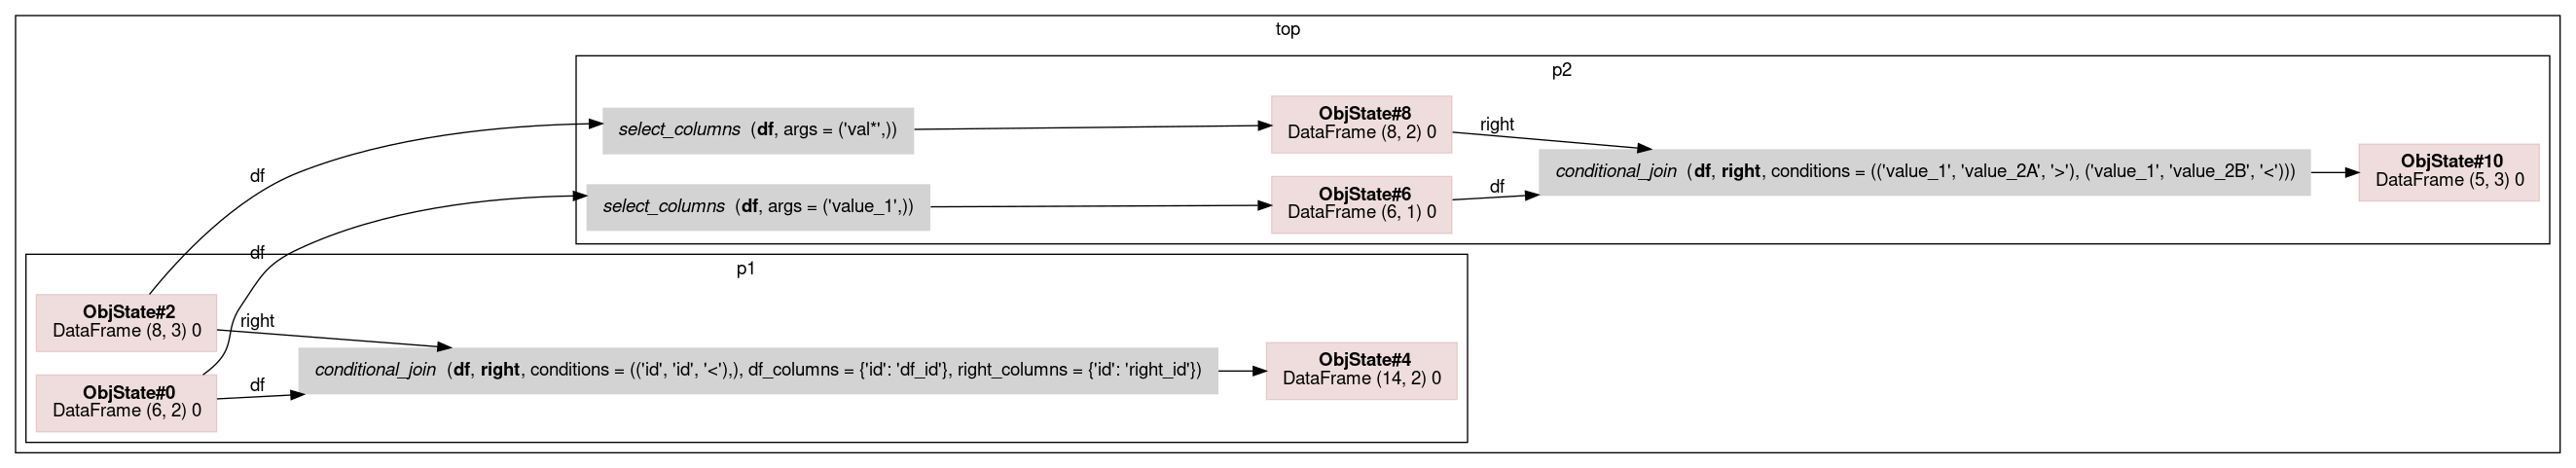

In [1]:
import pandas as pd
import janitor, pyjviz

df1 = pd.DataFrame({'id': [1,1,1,2,2,3], 'value_1': [2,5,7,1,3,4]})

df2 = pd.DataFrame({'id': [1,1,1,1,2,2,2,3],
                        'value_2A': [0,3,7,12,0,2,3,1],
                        'value_2B': [1,5,9,15,1,4,6,3]})

#if 1:
with pyjviz.CB("top") as C:
    with pyjviz.CB("p1") as p1:
        res1 = df1.conditional_join(df2,('id', 'id', "<"),
                                    df_columns = {'id':'df_id'},
                                    right_columns = {'id':'right_id'})
        
    with pyjviz.CB("p2"):
        res2 = df1.select_columns('value_1').conditional_join(
                                    df2.select_columns('val*'),
                                    ('value_1', 'value_2A', '>'),
                                    ('value_1', 'value_2B', '<'))
pyjviz.show()

gvz: <class 'graphviz.sources.Source'>


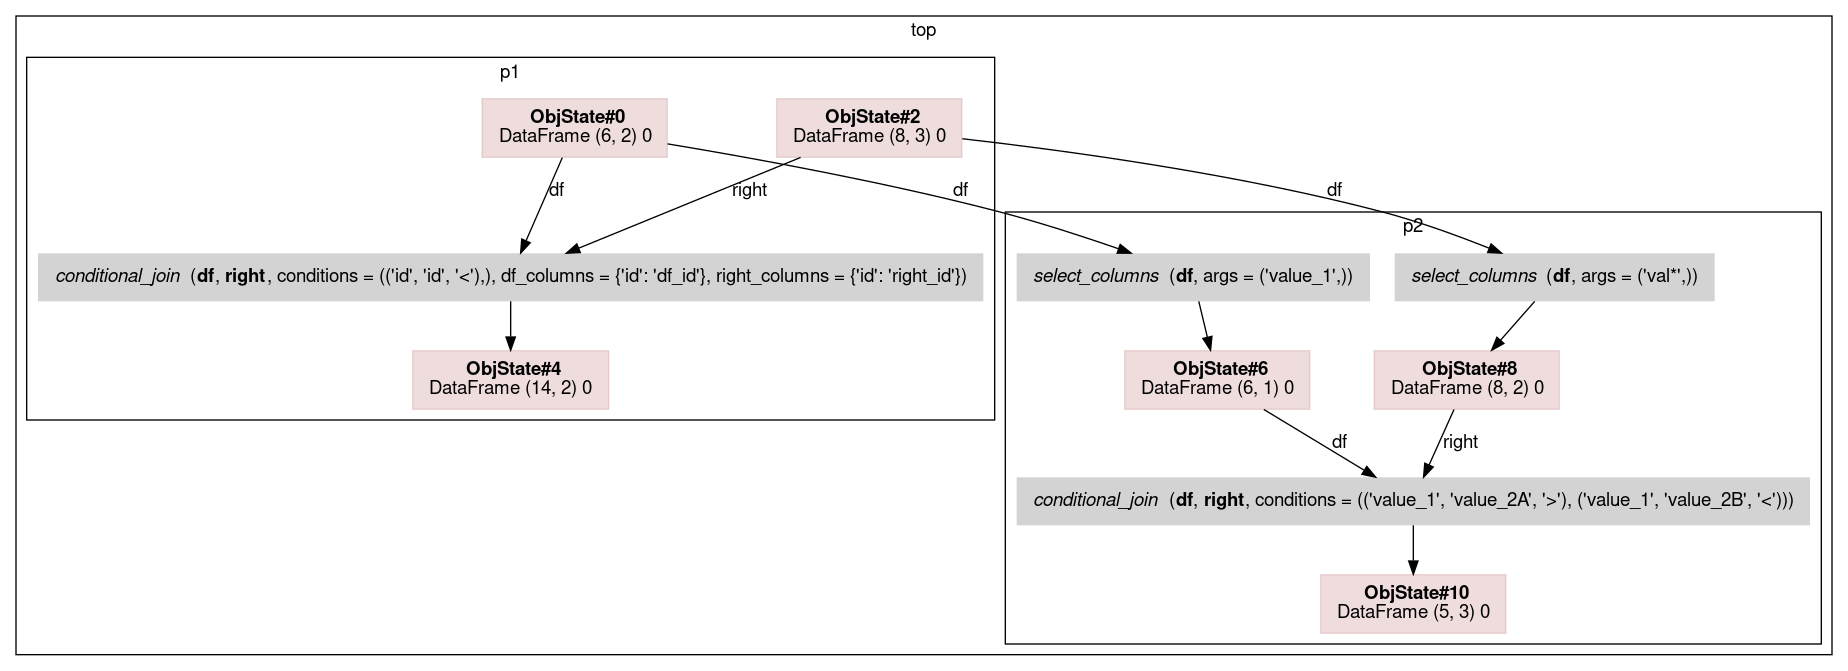

In [2]:
#print(pyjviz.triple_store.out_fd.getvalue()[:200])
pyjviz.show(vertical=True)
#C.show()